##### 2.1.2.3.2 Эквализация изображения

Другой популярной процедурой адаптивной гистограммной обработки изображения является *эквализация* изображения. Эквализация также отображает реальный яркостный диапазон данного изображения (от минимального до максимального значения интенсивности) на диапазон [0, 255]. При этом обеспечивается "выравнивание" числа пикселов изображения, имеющих различные значения яркости. Математическая форма данного преобразования имеет вид
$$
{\rm LUT}[i] = 255 \cdot  \frac{\sum\limits_{j=1}^i \textrm{Hist}[j]} {\sum\limits_{j=1}^{255} \textrm{Hist}[j]},
$$
В тех случаях, когда в диапазоне [Imin,Imax] более или менее равномерно присутствуют все градации, визуальный эффект от эквализации трудно отличить от эффекта нормализации. Однако в случае, когда значительная часть градаций яркости отсутствует, эквализация позволяет более равномерно использовать диапазон [0,255] для более контрастного отображения присутствующих на изображении градаций. Визуально это выглядит как "проявление" большего количества ранее не заметных на изображении деталей и контуров.

**Задание: реализуйте данный вид эквализации самостоятельно**

## Загрузка модулей

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Чтение изображения

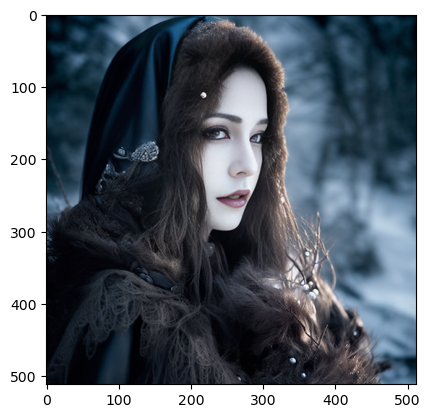

In [5]:
image = cv.imread("./img_1.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

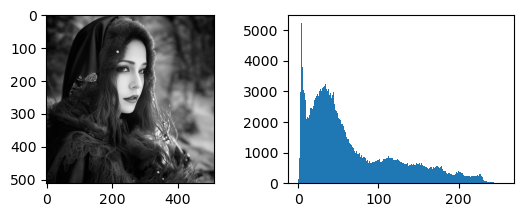

In [6]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
gs = plt.GridSpec(2, 2)
range = [0, 256]
plt.figure()
plt.subplot(gs[0])
plt.imshow(gray_image, cmap='gray')
plt.subplot(gs[1])
plt.hist(gray_image.reshape(-1), 256, range)
plt.show()

In [7]:
equalize_image = lambda img: (255 * np.cumsum(cv.calcHist([img], [0], None, [256], [0, 256])) / np.sum(cv.calcHist([img], [0], None, [256], [0, 256]))).astype(np.uint8)[img]

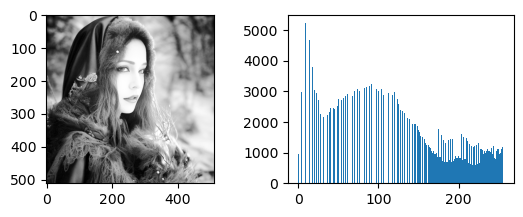

In [8]:
eq_image = equalize_image(gray_image)
plt.figure()
plt.subplot(gs[0])
plt.imshow(eq_image, cmap='gray')
plt.subplot(gs[1])
plt.hist(eq_image.reshape(-1), 256, range)
plt.show()